In [39]:
%load_ext autoreload
%aimport os, pandas, numpy, pickle
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pandas as pd
ds = pd.read_csv('./trajectory/dataset.csv')
rt = pd.read_csv('./trajectory/ref_traj.csv')

In [1]:
import pandas as pd
import sys
import os
import pickle
import argparse
from trlib.policies.valuebased import EpsilonGreedy
from trlib.policies.qfunction import ZeroQ
from sklearn.ensemble.forest import ExtraTreesRegressor
from trlib.algorithms.reinforcement.fqi_driver import FQIDriver, DoubleFQIDriver
from trlib.environments.trackEnv import TrackEnv
from trlib.utilities.ActionDispatcher import *
from fqi.dataset_preprocessing import *
from fqi.fqi_evaluate import run_evaluation
"""from fqi.et_tuning import run_tuning"""
from fqi.utils import *
from fqi.reward_function import *
from fqi.sars_creator import *
from fqi.result_plot import *
sys.setrecursionlimit(3000)

ref_df = pd.read_csv('./trajectory/ref_traj.csv')
data_df = pd.read_csv('./trajectory/dataset.csv')

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [44]:
state_cols

['xCarWorld',
 'yCarWorld',
 'nYawBody',
 'nEngine',
 'positionRho',
 'positionTheta',
 'referenceCurvature',
 'actualCurvature',
 'actualSpeedModule',
 'speedDifferenceVectorModule',
 'speedDifferenceOfModules',
 'actualAccelerationX',
 'actualAccelerationY',
 'referenceAccelerationX',
 'referenceAccelerationY',
 'accelerationDiffX',
 'accelerationDiffY',
 'prevaSteerWheel',
 'prevpBrakeF',
 'prevrThrottlePedal']

In [2]:
import pickle
with open('./model_file/eval_spatial_reward_model.pkl', 'rb') as e:
    evaluation = pickle.load(e)

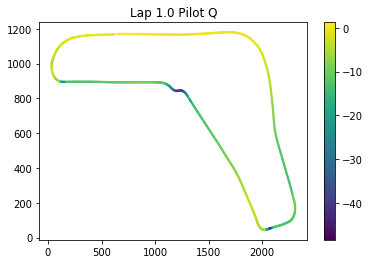

In [5]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,1)
plot_q(1.0, ds, evaluation, f, ax, 'policy', save_fig=False, path='./')

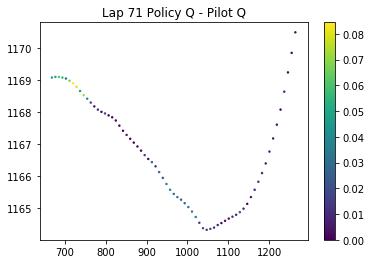

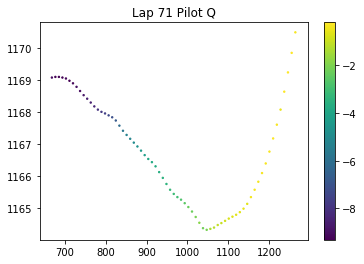

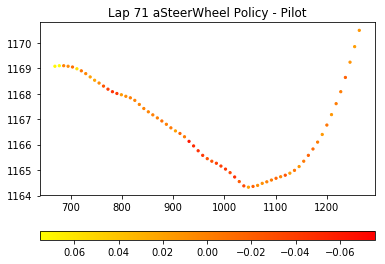

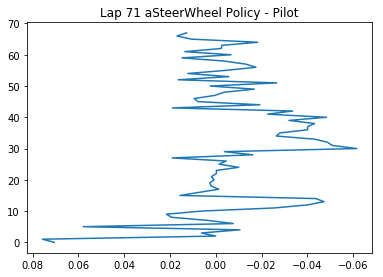

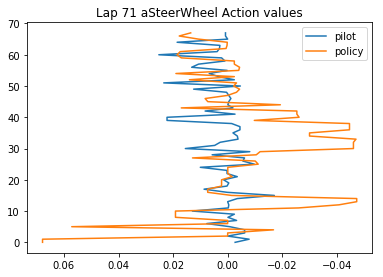

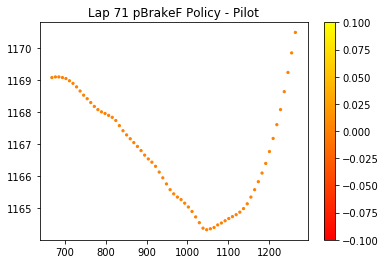

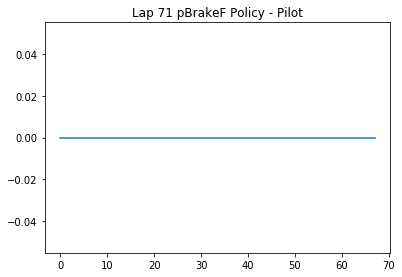

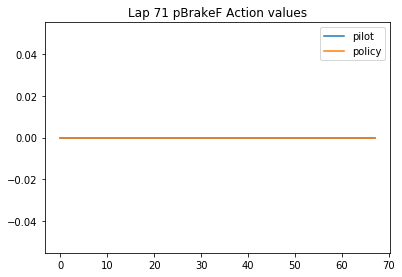

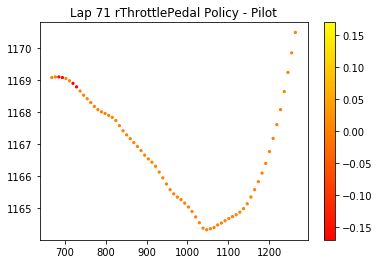

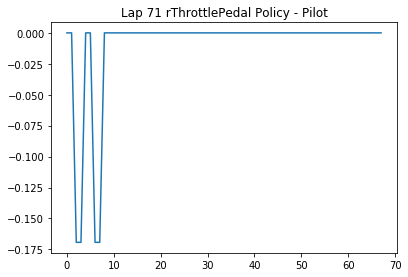

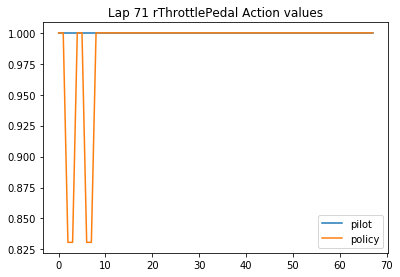

In [6]:
laps = list(evaluation.keys())
laps_to_analyse = [71]
for lap in laps_to_analyse:
    f, ax = plt.subplots(1,1)
    plot_q_delta(lap, ds, evaluation, f, ax)
    f, ax = plt.subplots(1,1)
    plot_q(lap, ds, evaluation, f, ax, 'pilot')
    for i in range(len(action_cols)):
        f, ax = plt.subplots(1,1)
        plot_action_delta(lap, i, ds, evaluation, f, ax)